In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/TIMOH/Downloads/healthcare-dataset-stroke-data (1).csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# handling inconsistencies

In [4]:
#capitalization
data1=data.copy()
data1=data.applymap(lambda x: x.lower() if type(x)==str else x)
data1.head(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1


In [5]:
# variable uniformity
data1.columns=data1.columns.str.lower()

In [6]:
data1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data1['gender'].value_counts()

female    2994
male      2115
other        1
Name: gender, dtype: int64

# missing values

In [8]:
data1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#checking the completeness of the dataset with missing values
def missings_(data1):
    miss      = data1.isnull().sum()
    miss_pct  = 100 * data1.isnull().sum()/len(data1)
    miss_pct      = pd.concat([miss,miss_pct], axis=1)
    missings_cols = miss_pct.rename(columns = {0:'Missing values', 1: 'Missing percentage'})
    missings_cols = missings_cols[missings_cols.iloc[:,1]!=0].sort_values('Missing percentage', ascending = False).round(2)
    return missings_cols
missings = missings_(data1)
missings

,Missing values,Missing percentage
bmi,201,3.93


In [10]:
# filling missing values
#bmi
print(data1['bmi'].dtype)
print(data1['bmi'].nunique())
data1['bmi'].value_counts()

float64
418


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [11]:
data1['bmi']=data1['bmi'].fillna(data1['bmi'].median())
data1['bmi'].isnull().sum()

0

In [12]:
data1.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.1,never smoked,1


In [13]:
#dropping id column
data1.drop(['id'],axis=1,inplace=True)
data1

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.1,never smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,female,80.0,1,0,yes,private,urban,83.75,28.1,never smoked,0
5106,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never smoked,0
5107,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never smoked,0
5108,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly smoked,0


In [14]:
data1.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# handling outliers

In [16]:
import numpy as np
data2=data1.select_dtypes(include=float)
data2

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,28.1
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,28.1
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


In [17]:
data1.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'age'), Text(1, 0, 'avg_glucose_level'), Text(2, 0, 'bmi')])

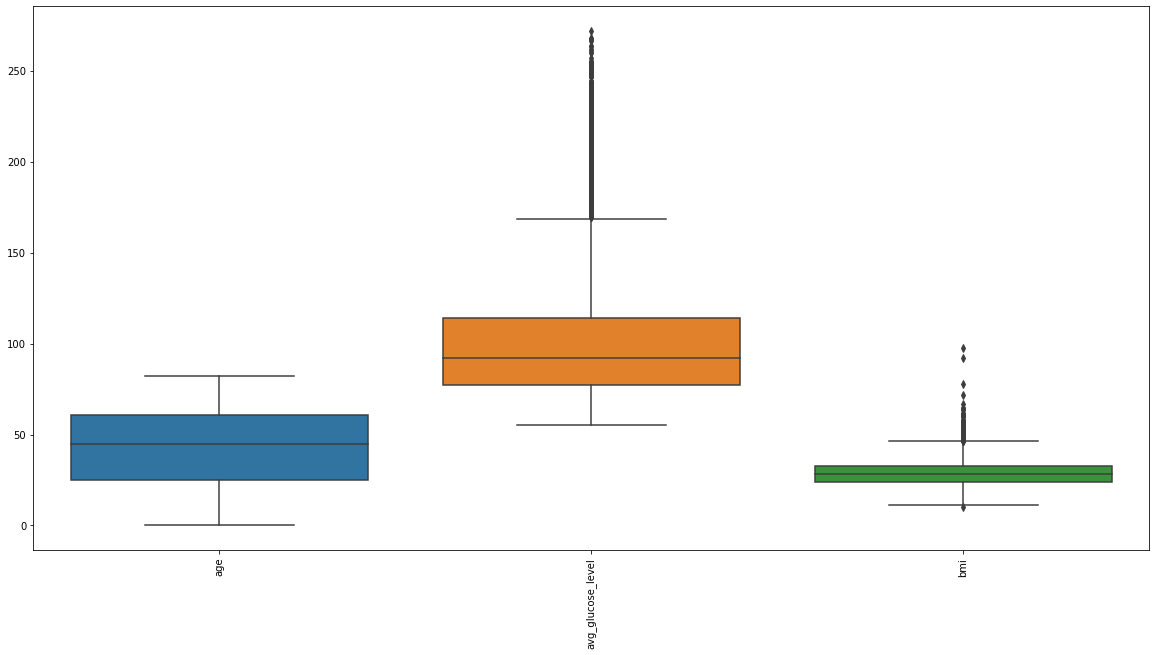

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(20,10))
sb.boxplot(data=data2)
plt.xticks(rotation=90)

In [19]:
def zscore(k):
  mean=np.mean(data2[k])
  std=np.std(data2[k])
  for k in data2[k]:
    z=abs((k-mean)/std)
    if z>3:
      print('outlier', k ,'in column', g)
for g in data2.columns:
  zscore(g)

outlier 252.72 in column avg_glucose_level
outlier 243.58 in column avg_glucose_level
outlier 259.63 in column avg_glucose_level
outlier 249.31 in column avg_glucose_level
outlier 263.32 in column avg_glucose_level
outlier 271.74 in column avg_glucose_level
outlier 242.52 in column avg_glucose_level
outlier 250.89 in column avg_glucose_level
outlier 247.51 in column avg_glucose_level
outlier 243.53 in column avg_glucose_level
outlier 242.3 in column avg_glucose_level
outlier 243.5 in column avg_glucose_level
outlier 251.6 in column avg_glucose_level
outlier 247.69 in column avg_glucose_level
outlier 250.2 in column avg_glucose_level
outlier 254.6 in column avg_glucose_level
outlier 254.63 in column avg_glucose_level
outlier 246.34 in column avg_glucose_level
outlier 251.46 in column avg_glucose_level
outlier 267.76 in column avg_glucose_level
outlier 246.53 in column avg_glucose_level
outlier 244.28 in column avg_glucose_level
outlier 251.99 in column avg_glucose_level
outlier 253.16 i

In [20]:
#filtering the outliers
filter=[]
#pos=0
for j in data2.columns:
    pos=-1
    mean=np.mean(data2[j])
    std=np.std(data2[j])
    for i in data2[j]:
        pos=pos+1 
        score=abs((i-mean)/std)
        if score>3:
            #print(i)
            #print(pos)
            filter.append(pos)

In [21]:
len(filter)

108

In [22]:
#dropping the outliers
data2=data1.iloc[filter,:]
len(data2)

108

In [23]:
OR=data1.drop(filter)

In [24]:
OR.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3887
bmi                   375
smoking_status          4
stroke                  2
dtype: int64

In [25]:
OR.shape,data1.shape

((5002, 11), (5110, 11))

# duplicates

In [26]:
data3=OR.duplicated().sum()
data3

0

In [27]:
OR.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3887
bmi                   375
smoking_status          4
stroke                  2
dtype: int64

In [28]:
data3=OR.select_dtypes(include=float)
data3

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,28.1
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,28.1
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


# scaling

In [29]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=scaler.fit_transform(data3)
df

array([[0.81689453, 0.9344783 , 0.63221154],
       [0.74365234, 0.79191343, 0.42788462],
       [0.97558594, 0.27350059, 0.53365385],
       ...,
       [0.42626953, 0.15004845, 0.48798077],
       [0.62158203, 0.59852482, 0.36778846],
       [0.53613281, 0.16237752, 0.38221154]])

In [30]:
df

array([[0.81689453, 0.9344783 , 0.63221154],
       [0.74365234, 0.79191343, 0.42788462],
       [0.97558594, 0.27350059, 0.53365385],
       ...,
       [0.42626953, 0.15004845, 0.48798077],
       [0.62158203, 0.59852482, 0.36778846],
       [0.53613281, 0.16237752, 0.38221154]])

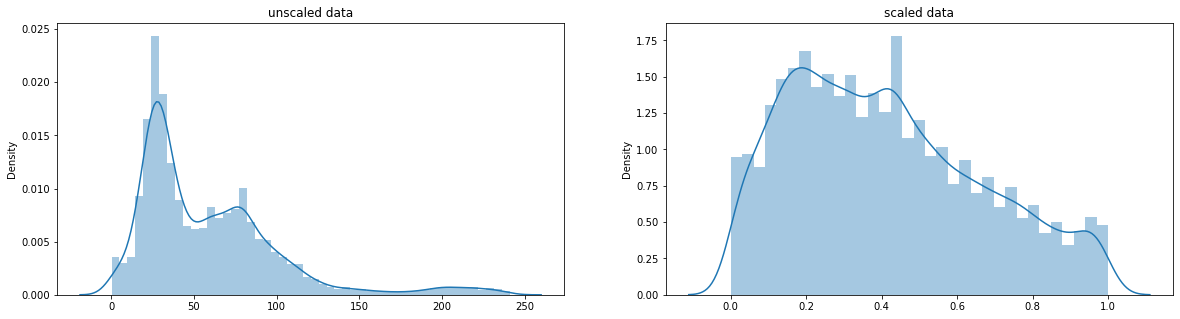

In [31]:
import warnings
warnings.filterwarnings('ignore')
fig,ax=plt.subplots(1,2, figsize=(20,5))
sb.distplot(data3,ax=ax[0])
ax[0].set_title('unscaled data')
sb.distplot(df,ax=ax[1])
ax[1].set_title('scaled data');

In [32]:
OR.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3887
bmi                   375
smoking_status          4
stroke                  2
dtype: int64

# DATA VISUALIZATION

0    95.2
1     4.8
Name: stroke, dtype: float64

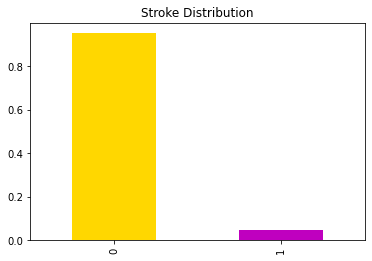

In [33]:
OR.stroke.value_counts(normalize=True).plot.bar(title='Stroke Distribution',color=['gold','m'])
OR.stroke.value_counts(normalize=True).round(3)*100

# HISTOGRAM

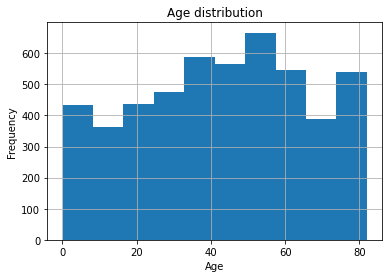

In [34]:
#age
plt.hist(OR.age);
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.grid()

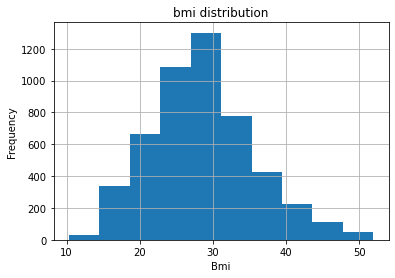

In [35]:
# BMI
plt.hist(OR.bmi);
plt.xlabel('Bmi')
plt.ylabel('Frequency')
plt.title('bmi distribution')
plt.grid()

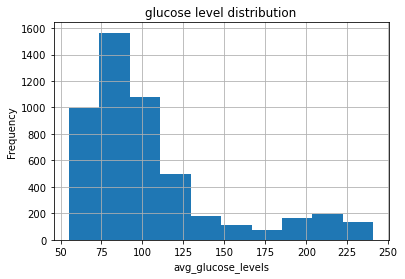

In [36]:
# avg_glucose_levels
plt.hist(OR.avg_glucose_level);
plt.xlabel('avg_glucose_levels')
plt.ylabel('Frequency')
plt.title('glucose level distribution')
plt.grid()

# Barplot

In [37]:
OR.groupby('stroke')['age'].mean()

stroke
0    41.747571
1    67.654059
Name: age, dtype: float64

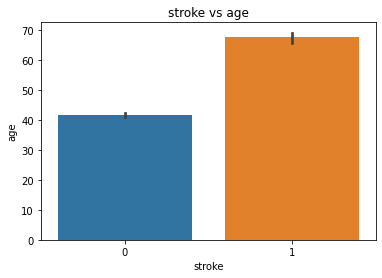

In [38]:
sb.barplot(x='stroke',y='age',data=OR);
plt.title('stroke vs age');

In [39]:
OR.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [40]:
OR.groupby('stroke')['avg_glucose_level'].mean()

stroke
0    103.375992
1    127.608033
Name: avg_glucose_level, dtype: float64

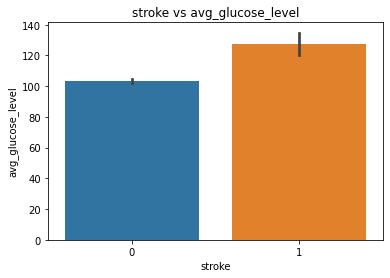

In [41]:
sb.barplot(x='stroke',y='avg_glucose_level',data=OR);
plt.title('stroke vs avg_glucose_level');

In [42]:
OR.groupby('stroke')['bmi'].mean()

stroke
0    28.425299
1    29.792469
Name: bmi, dtype: float64

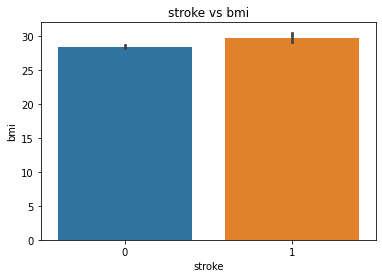

In [43]:
sb.barplot(x='stroke',y='bmi',data=OR);
plt.title('stroke vs bmi');

In [44]:
OR.groupby('hypertension')['bmi'].mean()

hypertension
0    28.173108
1    31.559488
Name: bmi, dtype: float64

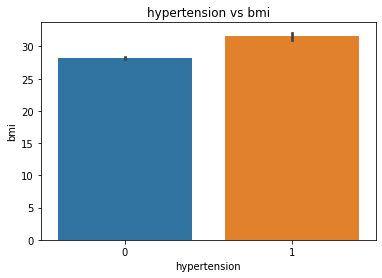

In [45]:
sb.barplot(x='hypertension',y='bmi',data=OR);
plt.title('hypertension vs bmi');

# comparing categorical variables

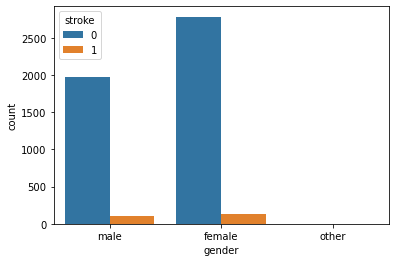

In [46]:
# countplot
#crosstabulation 
#sb.countplot('gender',data=OR);
pd.crosstab(OR.stroke,OR.gender)
sb.countplot(x='gender',hue='stroke',data=OR);


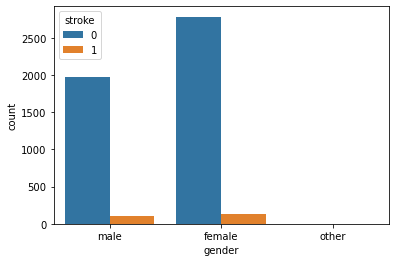

In [47]:
sb.countplot(x='gender',hue='stroke',data=OR);

In [48]:
#sb.countplot('hypertension',data=OR);
pd.crosstab(OR.stroke,OR.hypertension)


hypertension,0,1
stroke,,
0,4354,409
1,179,60


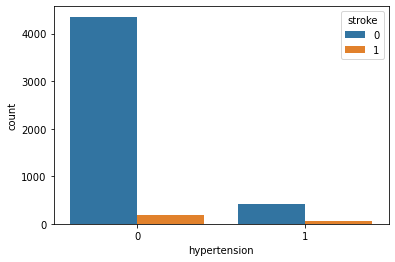

In [49]:
sb.countplot(x='hypertension',hue='stroke',data=OR);

In [50]:
#sb.countplot('heart_disease',data=OR);
pd.crosstab(OR.stroke,OR.heart_disease)

heart_disease,0,1
stroke,,
0,4540,223
1,196,43


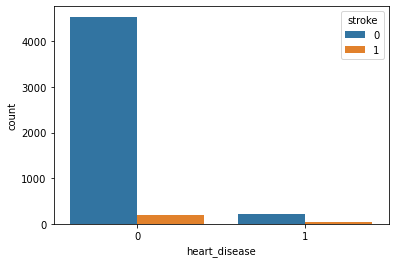

In [51]:
sb.countplot(x='heart_disease',hue='stroke',data=OR);

In [52]:
#sb.countplot('ever_married',data=OR);
pd.crosstab(OR.stroke,OR.ever_married)

ever_married,no,yes
stroke,,
0,1713,3050
1,29,210


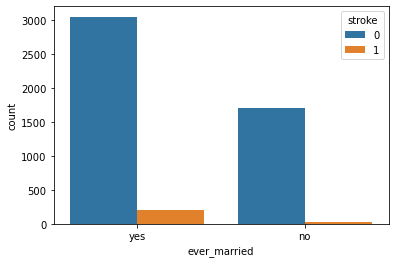

In [53]:
sb.countplot(x='ever_married',hue='stroke',data=OR);

In [54]:
#sb.countplot('work_type',data=OR);
pd.crosstab(OR.stroke,OR.work_type)

work_type,children,govt_job,never_worked,private,self-employed
stroke,,,,,
0,685,609,22,2714,733
1,2,32,0,141,64


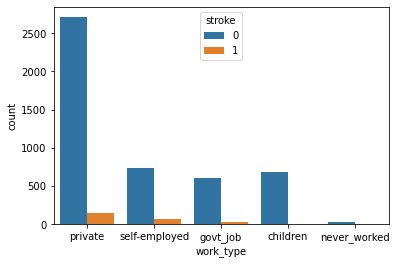

In [55]:
sb.countplot(x='work_type',hue='stroke',data=OR);

In [56]:
#sb.countplot('residence_type',data=OR);
pd.crosstab(OR.stroke,OR.residence_type)

residence_type,rural,urban
stroke,,
0,2352,2411
1,108,131


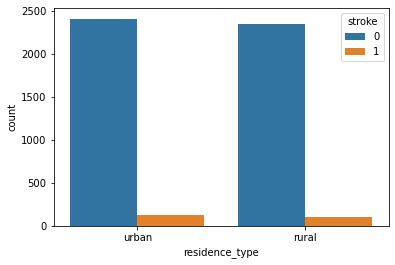

In [57]:
sb.countplot(x='residence_type',hue='stroke',data=OR);

In [58]:
#sb.countplot('smoking_status',data=OR);
pd.crosstab(OR.stroke,OR.smoking_status)

smoking_status,formerly smoked,never smoked,smokes,unknown
stroke,,,,
0,795,1763,728,1477
1,67,86,39,47


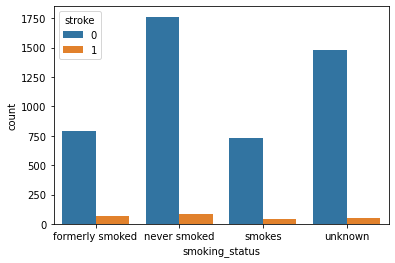

In [59]:
sb.countplot(x='smoking_status',hue='stroke',data=OR);

# categorical encoding

In [60]:
OR.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder
obj=OR.select_dtypes(include='object').columns
obj

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')

In [62]:
objj=['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status']

In [63]:
OR_HOT=pd.get_dummies(OR,columns=['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'])
OR_HOT.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,gender_other,ever_married_no,...,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,residence_type_rural,residence_type_urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
1,61.0,0,0,202.21,28.1,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [64]:
le=LabelEncoder()
for ob in objj:
    OR[ob]=le.fit_transform(OR[ob])
OR.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [65]:
OR['smoking_status'].value_counts()

1    1849
3    1524
0     862
2     767
Name: smoking_status, dtype: int64

# feature selection

In [66]:
x=OR_HOT.drop(['stroke'],1)
y=OR_HOT['stroke']

In [67]:
# Feature extraction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(k=5, score_func=chi2).fit_transform(x, y)
X_new

array([[ 67.  ,   0.  ,   1.  , 228.69,   0.  ],
       [ 61.  ,   0.  ,   0.  , 202.21,   0.  ],
       [ 80.  ,   0.  ,   1.  , 105.92,   0.  ],
       ...,
       [ 35.  ,   0.  ,   0.  ,  82.99,   0.  ],
       [ 51.  ,   0.  ,   0.  , 166.29,   0.  ],
       [ 44.  ,   0.  ,   0.  ,  85.28,   0.  ]])

In [68]:
OR1=pd.DataFrame(X_new)
OR1

,0,1,2,3,4
0,67.0,0.0,1.0,228.69,0.0
1,61.0,0.0,0.0,202.21,0.0
2,80.0,0.0,1.0,105.92,0.0
3,49.0,0.0,0.0,171.23,0.0
4,79.0,1.0,0.0,174.12,0.0
...,...,...,...,...,...
4997,80.0,1.0,0.0,83.75,0.0
4998,81.0,0.0,0.0,125.20,0.0
4999,35.0,0.0,0.0,82.99,0.0
5000,51.0,0.0,0.0,166.29,0.0


In [69]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_female,gender_male,gender_other,ever_married_no,ever_married_yes,...,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,residence_type_rural,residence_type_urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
1,61.0,0,0,202.21,28.1,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
5107,35.0,0,0,82.99,30.6,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0


<AxesSubplot:>

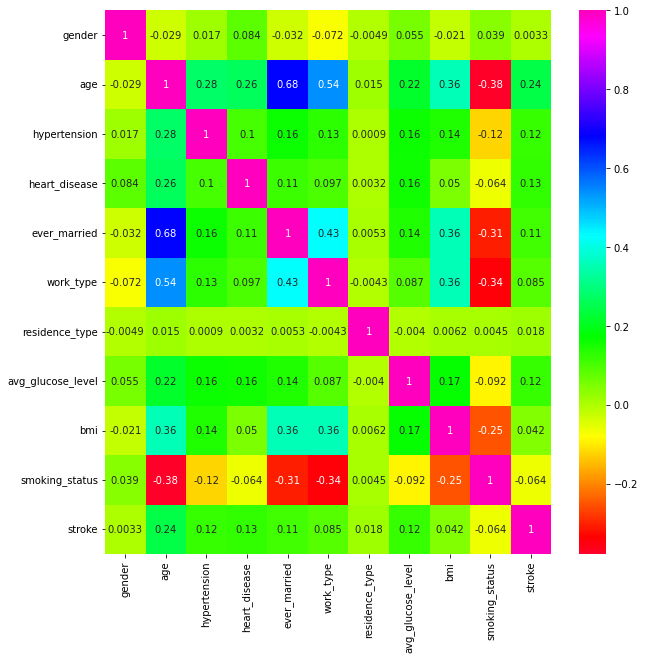

In [70]:
plt.figure(figsize=(10,10))
cor=OR.corr()
sb.heatmap(cor, cmap='gist_rainbow', annot=True,)

# statistical analysis

 # TWO SAMPLE T-TEST  

In [71]:
OR.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [72]:
#stroke vs age
from scipy.stats import ttest_ind
OR.groupby('stroke').age.mean()

stroke
0    41.747571
1    67.654059
Name: age, dtype: float64

In [73]:
from scipy.stats import ttest_ind
ns=OR.age[OR.stroke==0]
ws=OR.age[OR.stroke==1]

In [74]:
tscore,pvalue=ttest_ind(ns,ws,equal_var=False)
alpha=0.05
print('t_score: {:.4f})'.format(tscore))
print('pvalue: {:.4f})'.format(pvalue))
print('level of significance: {:.2f})'.format(alpha))

t_score: -29.1532)
pvalue: 0.0000)
level of significance: 0.05)


In [75]:
# stroke vs bmi
nb=OR.bmi[OR.stroke==0]
wb=OR.bmi[OR.stroke==1]

In [76]:
tscore,pvalue=ttest_ind(nb,wb,equal_var=False)
alpha=0.05
print('t_score: {:.4f})'.format(tscore))
print('pvalue: {:.4f})'.format(pvalue))
print('level of significance: {:.2f})'.format(alpha))

t_score: -3.6640)
pvalue: 0.0003)
level of significance: 0.05)


In [77]:
# stroke vs average glucose levels
ng=OR.avg_glucose_level[OR.stroke==0]
wg=OR.avg_glucose_level[OR.stroke==1]

In [78]:
tscore,pvalue=ttest_ind(ng,wg,equal_var=False)
alpha=0.05
print('t_score: {:.4f})'.format(tscore))
print('pvalue: {:.4f})'.format(pvalue))
print('level of significance: {:.2f})'.format(alpha))

t_score: -6.3626)
pvalue: 0.0000)
level of significance: 0.05)


In [79]:
# categorical variables using chi_square
# stroke vs gender
import scipy
from scipy.stats import chi2_contingency
sg=pd.crosstab(OR['stroke'],OR['gender'])
sg
chi_2,p_value,gol,frequency=chi2_contingency(sg,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.95,chi_2=0.11


In [80]:
# stroke vs hypertension
sh=pd.crosstab(OR['stroke'],OR['hypertension'])
sh
chi_2,p_value,gol,frequency=chi2_contingency(sh,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=73.07


In [81]:
# stroke vs heart_disease
shd=pd.crosstab(OR['stroke'],OR['heart_disease'])
shd
chi_2,p_value,gol,frequency=chi2_contingency(shd,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=80.07


In [82]:
# stroke vs ever_married
se=pd.crosstab(OR['stroke'],OR['ever_married'])
se
chi_2,p_value,gol,frequency=chi2_contingency(se,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=56.94


In [83]:
# stroke vs work_type
swt=pd.crosstab(OR['stroke'],OR['work_type'])
swt
chi_2,p_value,gol,frequency=chi2_contingency(swt,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=50.26


In [84]:
# stroke vs residence_type
srt=pd.crosstab(OR['stroke'],OR['residence_type'])
srt
chi_2,p_value,gol,frequency=chi2_contingency(srt,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.21,chi_2=1.60


In [85]:
# stroke vs smoking status
sst=pd.crosstab(OR['stroke'],OR['smoking_status'])
sst
chi_2,p_value,gol,frequency=chi2_contingency(sst,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=26.83


# Machine learning

In [86]:
# seperating the data
import warnings
warnings.filterwarnings('ignore')
X=OR_HOT.drop('stroke',1)
Y=OR_HOT.stroke

In [87]:
from imblearn.over_sampling import SMOTE
import imblearn

In [88]:
sm=SMOTE()
Xs,Ys=sm.fit_resample(X,Y)

In [89]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xs,Ys,test_size=0.15,random_state=42)

In [90]:
x_train.shape,x_test.shape

((8097, 21), (1429, 21))

In [91]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

# Decision tree classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt=DecisionTreeClassifier()

In [94]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
dt_pred=dt.predict(x_test)

In [96]:
accuracy_score(y_test,dt_pred)

0.940517844646606

In [97]:
precision_score(y_test,dt_pred)

0.9352617079889807

In [98]:
recall_score(y_test,dt_pred)

0.9470013947001394

In [99]:
f1_score(y_test,dt_pred)

0.9410949410949411

In [100]:
confusion_matrix(y_test,dt_pred)

array([[665,  47],
       [ 38, 679]], dtype=int64)

In [101]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.exceptions import YellowbrickValueError

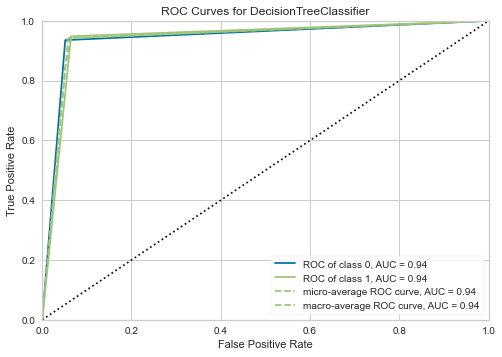

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [102]:
dt=DecisionTreeClassifier()
roc_dt=ROCAUC(dt)
roc_dt.fit(x_train,y_train)
roc_dt.score(x_test,y_test)
roc_dt.show()

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf=RandomForestClassifier(random_state=0)

In [105]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [106]:
rf_pred=rf.predict(x_test)

In [107]:
accuracy_score(y_test,rf_pred)

0.9692092372288313

In [108]:
recall_score(y_test,rf_pred)

0.9539748953974896

In [109]:
precision_score(y_test,rf_pred)

0.9841726618705036

In [110]:
f1_score(y_test,rf_pred)

0.9688385269121813

In [111]:
confusion_matrix(y_test,rf_pred)

array([[701,  11],
       [ 33, 684]], dtype=int64)

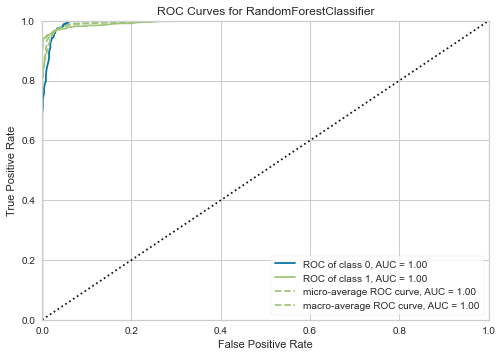

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [112]:
rf=RandomForestClassifier()
roc_rf=ROCAUC(rf)
roc_rf.fit(x_train,y_train)
roc_rf.score(x_test,y_test)
roc_rf.show()

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
gb=GradientBoostingClassifier()

In [115]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [116]:
gb_pred=gb.predict(x_test)

In [117]:
accuracy_score(y_test,gb_pred)

0.9622113365990203

In [118]:
recall_score(y_test,gb_pred)

0.9316596931659693

In [119]:
precision_score(y_test,gb_pred)

0.9925705794947994

In [120]:
f1_score(y_test,gb_pred)

0.9611510791366906

In [121]:
confusion_matrix(y_test,gb_pred)

array([[707,   5],
       [ 49, 668]], dtype=int64)

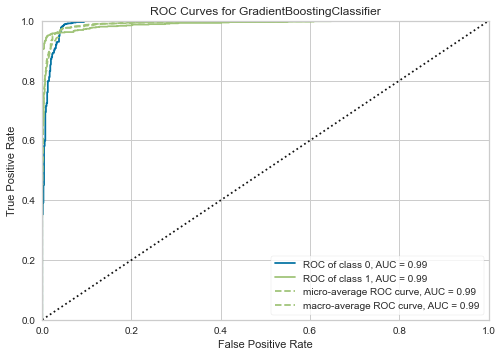

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [122]:
gb=GradientBoostingClassifier()
roc_gb=ROCAUC(gb)
roc_gb.fit(x_train,y_train)
roc_gb.score(x_test,y_test)
roc_gb.show()

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [124]:
ab=AdaBoostClassifier()

In [125]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [126]:
ab_pred=ab.predict(x_test)

In [127]:
accuracy_score(y_test,ab_pred)

0.9538138558432471

In [128]:
recall_score(y_test,ab_pred)

0.9149232914923291

In [129]:
precision_score(y_test,ab_pred)

0.9924357034795764

In [130]:
f1_score(y_test,ab_pred)

0.9521044992743105

In [131]:
confusion_matrix(y_test,ab_pred)

array([[707,   5],
       [ 61, 656]], dtype=int64)

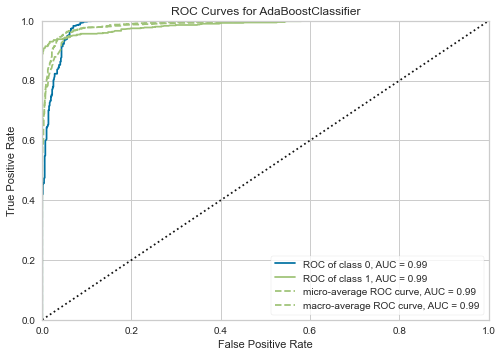

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [132]:
ab=AdaBoostClassifier()
roc_ab=ROCAUC(ab)
roc_ab.fit(x_train,y_train)
roc_ab.score(x_test,y_test)
roc_ab.show()

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
kn=KNeighborsClassifier()

In [135]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [136]:
kn_pred=kn.predict(x_test)

In [137]:
accuracy_score(y_test,kn_pred)

0.8831350594821553

In [138]:
recall_score(y_test,kn_pred)

0.9679218967921897

In [139]:
precision_score(y_test,kn_pred)

0.8281622911694511

In [140]:
f1_score(y_test,kn_pred)

0.8926045016077171

In [141]:
confusion_matrix(y_test,kn_pred)

array([[568, 144],
       [ 23, 694]], dtype=int64)

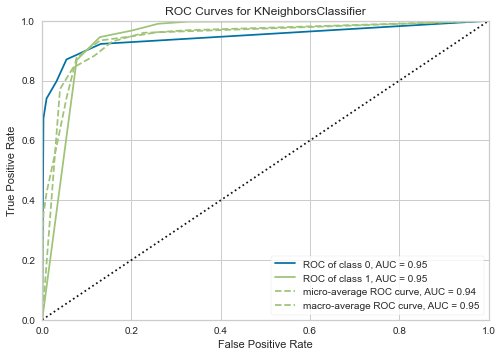

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [142]:
kn=KNeighborsClassifier()
roc_kn=ROCAUC(kn)
roc_kn.fit(x_train,y_train)
roc_kn.score(x_test,y_test)
roc_kn.show()

# feature importance

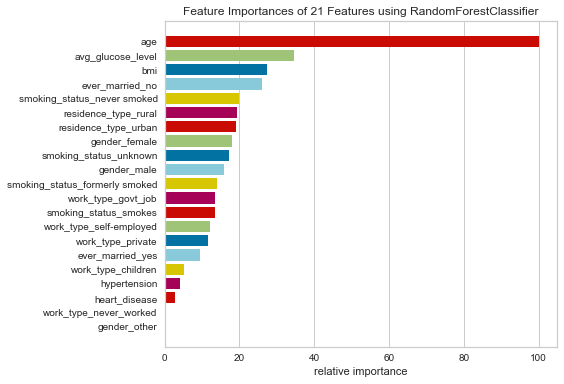

<AxesSubplot:title={'center':'Feature Importances of 21 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [143]:
from yellowbrick.model_selection import cv_scores,FeatureImportances
rf=RandomForestClassifier(random_state=0)
imp=FeatureImportances(rf)
imp.fit(x_train,y_train)
imp.show()

In [144]:
X=OR.drop('stroke',1)
Y=OR.stroke

In [145]:
sm=SMOTE()
Xs,Ys=sm.fit_resample(X,Y)

In [146]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xs,Ys,test_size=0.15,random_state=42)

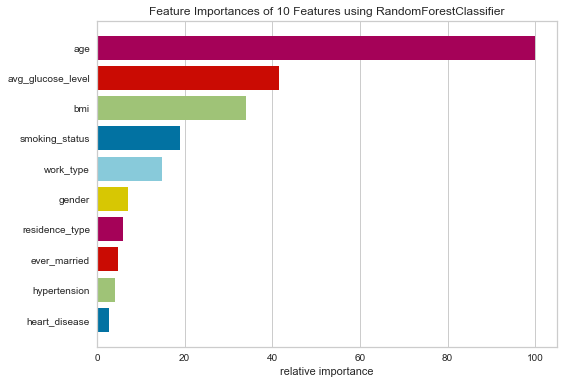

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [147]:
from yellowbrick.model_selection import cv_scores,FeatureImportances
rf=RandomForestClassifier(random_state=0)
imp=FeatureImportances(rf)
imp.fit(x_train,y_train)
imp.show()

In [148]:
import pickle

In [150]:
model=RandomForestClassifier().fit(Xs,Ys)
model.score(Xs,Ys)

1.0

In [151]:
# create an iterator object withwrite permision-model.pkl
pickle.dump(model,open('RandomForest.pkl','wb'))

In [152]:
OR.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,228.69,36.6,0,1
1,0,61.0,0,0,1,4,0,202.21,28.1,1,1
2,1,80.0,0,1,1,3,0,105.92,32.5,1,1
3,0,49.0,0,0,1,3,1,171.23,34.4,2,1
4,0,79.0,1,0,1,4,0,174.12,24.0,1,1
